## Imports

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Basics

In [7]:
# Importing img

img = cv2.imread("./Images/amsterdam-aesthetic-5120x3364-18759.jpg")

In [8]:
# showing images

def show_img(img, gray = False):
    if gray:
        plt.imshow(img, cmap ="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()

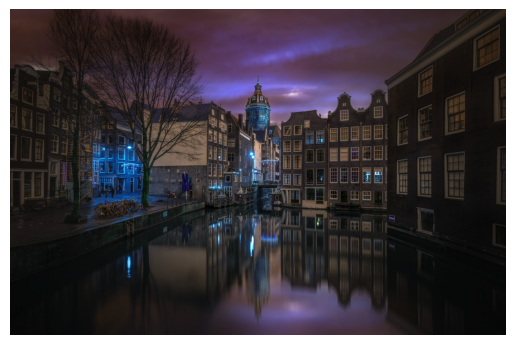

In [9]:
show_img(img)

In [8]:
# converting into grayscale

gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

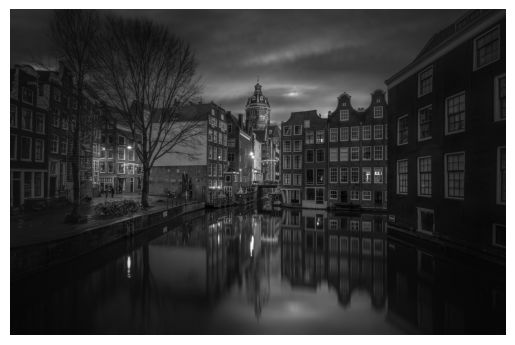

In [9]:
show_img(gs, True)

In [10]:
# Meta data

print(f"Image size: {img.size}")
print(f"image shape: {img.shape}")
print(f"Image data type: {img.dtype}")

Image size: 51671040
image shape: (3364, 5120, 3)
Image data type: uint8


## Image transformations

Resizing: Changing the dimensions of an image (e.g., scaling up or down).

Rotation: Rotating an image by a specified angle.

Translation: Shifting an image along the x or y axis.

Cropping: Extracting a region of interest (ROI) from an image.

Flipping: Mirroring an image horizontally or vertically.

Affine Transformation: A linear mapping method that preserves points, straight lines, and planes (e.g., rotation, scaling, translation).

Perspective Transformation: A transformation that changes the perspective of an image (e.g., correcting a tilted view).

In [11]:
# Resize 

resized_image = cv2.resize(img, (255,255))

In [12]:
def show_img(img, gray = False):
    if gray:
        plt.imshow(img, cmap = "gray")
    else:
        plt.imshow(img)

    plt.axis("off")
    plt.show()
    

In [13]:
# resized containing aspect ratio 

img_shape = img.shape
resized_image = cv2.resize(img, (img_shape[1]//10, img_shape[0]//10))

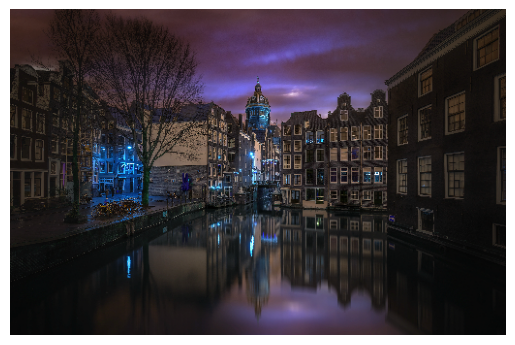

In [14]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [15]:
# Rotate

(h,w) = img.shape[:2]

In [16]:
center = (w //2 , h//2)


In [17]:
w, h, center

(5120, 3364, (2560, 1682))

In [18]:
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(img, rotation_matrix, (w,h))

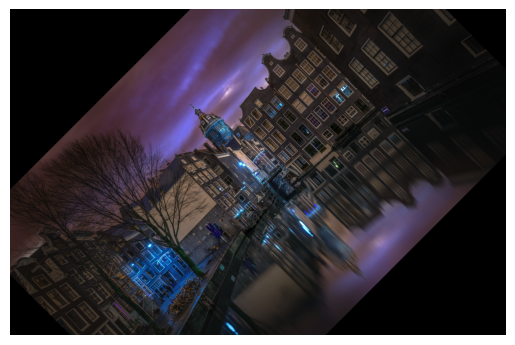

In [19]:
show_img(rotated_image)

In [20]:
# translate

translation_matrix = np.float32([[1,0,500],[0,1,300]])
transition_image = cv2.warpAffine(img, translation_matrix, (w, h))

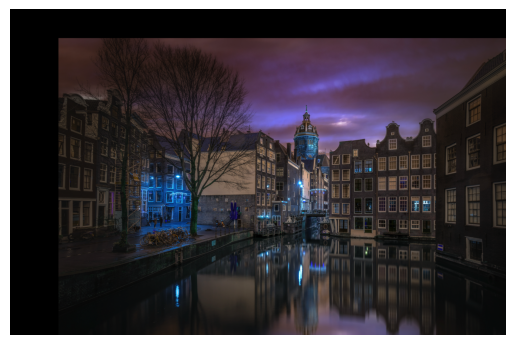

In [21]:
show_img(transition_image)

In [22]:
# crop

cropped_image = img[w//3: ,h//4: ] # w1:w2 , h1:h2

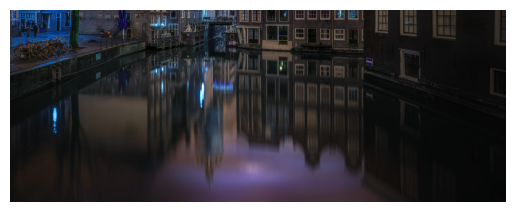

In [23]:
show_img(cropped_image)

In [24]:
# Flip

flipped_image = cv2.flip(img, 0) # 1 for horizondal 0 for vertical

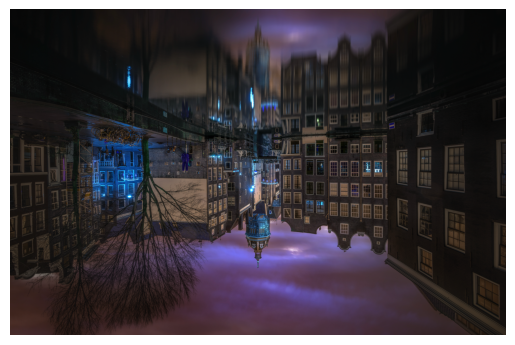

In [25]:
show_img(flipped_image)

## Image enchancements

Contrast Adjustment: Increasing or decreasing the difference between light and dark areas.

Brightness Adjustment: Increasing or decreasing the overall intensity of an image.

Histogram Equalization: Improving contrast by spreading out pixel intensity values.

Gamma Correction: Adjusting the brightness of an image using a non-linear operation.

Sharpening: Enhancing the edges and details in an image.

Smoothing/Blurring: Reducing noise or details in an image (e.g., Gaussian blur, median blur).

In [26]:
# Adjust contrast and brightness

alpha =1.5  # contrast
beta = 50 # brightness
enchanced_image = cv2.convertScaleAbs(img, alpha = alpha, beta = beta)

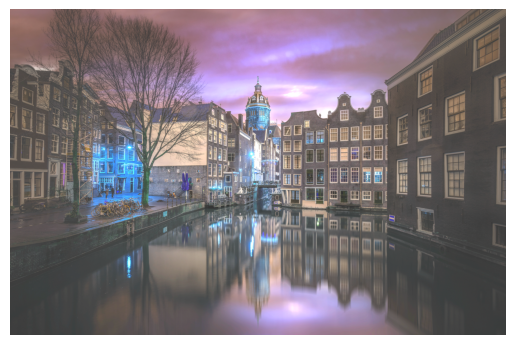

In [27]:
show_img(enchanced_image)

In [28]:
# Histogram equalizer

equalized_image = cv2.equalizeHist(gs)

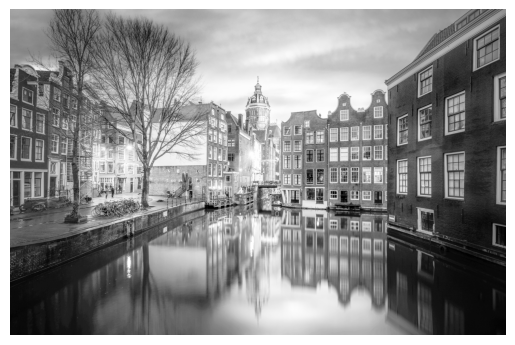

In [29]:
show_img(equalized_image, True)

In [30]:
# Gamme correction

gamma = 1.5
gamma_corrected = np.uint8(((img/255.0) ** gamma) *255)

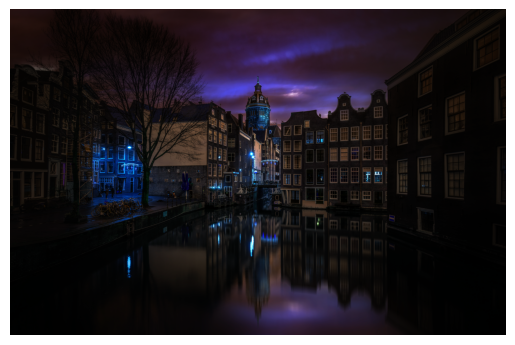

In [31]:
show_img(gamma_corrected)

In [32]:
# Sharpening

kernal = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened_image = cv2.filter2D(img, -1, kernal)

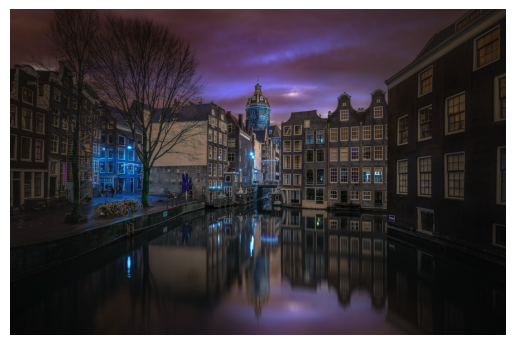

In [33]:
show_img(sharpened_image)

In [34]:
# smoothing / bluring

blurred_image = cv2.blur(img, (5,5))

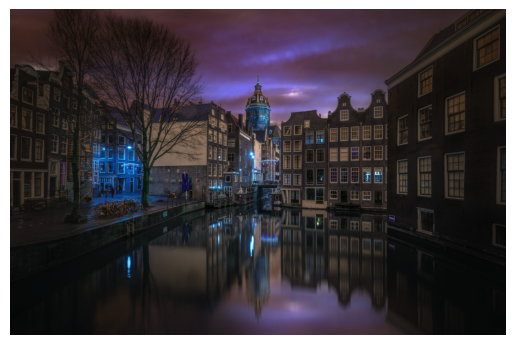

In [35]:
show_img(blurred_image)

## Filtering and convolution

Kernel/Filter: A small matrix used for convolution operations to apply effects like blurring, sharpening, or edge detection.

Convolution: A mathematical operation where a kernel is applied to an image to produce a new image.

Edge Detection: Identifying edges in an image using filters like Sobel, Prewitt, or Canny.

Gaussian Blur: A blurring technique that uses a Gaussian function to smooth an image.

Median Filtering: A noise reduction technique that replaces each pixel with the median of neighboring pixels.

In [36]:
image = cv2.imread("./Images/xray.jpeg")

In [37]:
# Edge detection

edges = cv2.Canny(image, 50,50)

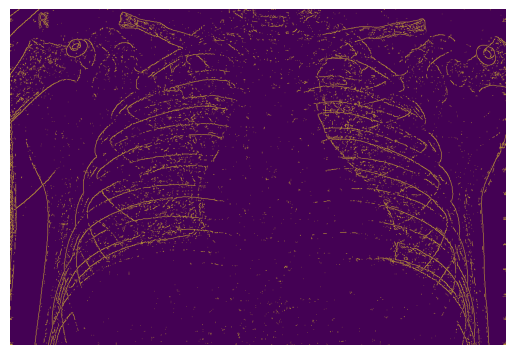

In [38]:
show_img(edges)

In [39]:
# Gaussian blur

gaussian_blur = cv2.GaussianBlur(img, (5,5),0)

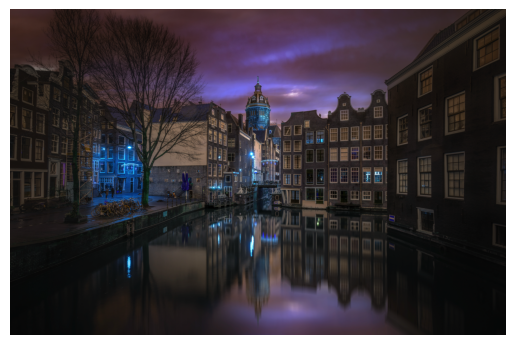

In [40]:
show_img(gaussian_blur)

In [41]:
# Median blur

median_blur = cv2.medianBlur(img, 5)

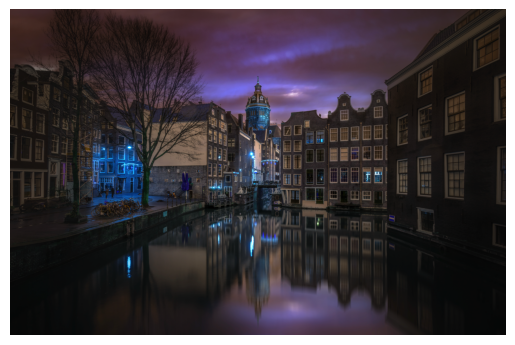

In [42]:
show_img(median_blur)

## Feature Extration

Edges: Boundaries between regions with distinct intensity values.

Corners: Points where two edges meet, often used for feature detection.

Keypoints: Distinct points in an image used for object recognition or matching.

Descriptors: Numerical representations of keypoints or regions (e.g., SIFT, SURF, ORB).

Texture: Patterns of intensity variations in an image (e.g., smooth, rough).

In [60]:
# Harris corner detection

gray = np.float32(gs)

corners = cv2.cornerHarris(gray, 2,3,0.04)
corners = cv2.dilate(corners, None)
imgs = img.copy()
imgs[corners >0.01 * corners.max()] = [0,225,0]

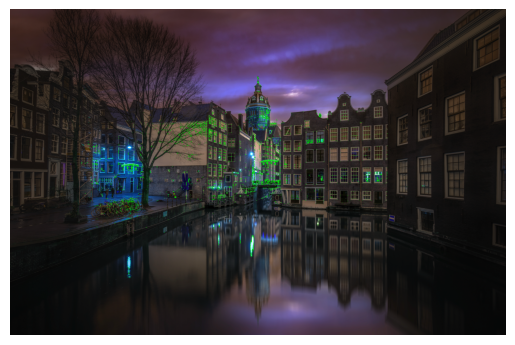

In [61]:
show_img(imgs)

## Segmentation

Thresholding: Dividing an image into regions based on pixel intensity values (e.g., binary thresholding).

Region-Based Segmentation: Grouping pixels into regions based on similarity (e.g., watershed algorithm).

Edge-Based Segmentation: Using edges to separate objects in an image.

Clustering: Grouping pixels based on similarity (e.g., k-means clustering).

Mask: A binary image used to isolate specific regions of interest.

In [62]:
# Thresholding

_, binary_image = cv2.threshold(gs, 150, 255, cv2.THRESH_BINARY)

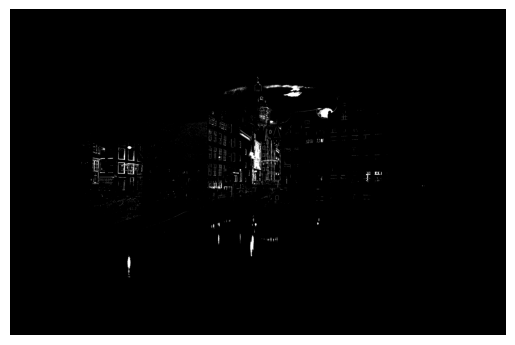

In [63]:
show_img(binary_image, True)


In [64]:
# Otsu's thresholding

_, otsu_image = cv2.threshold(gs, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

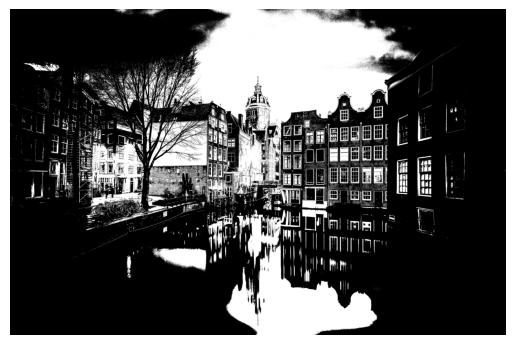

In [65]:
show_img(otsu_image, True)

## Morphological operations

Erosion: Shrinking the boundaries of foreground objects.

Dilation: Expanding the boundaries of foreground objects.

Opening: Erosion followed by dilation, used to remove noise.

Closing: Dilation followed by erosion, used to fill small holes.

Gradient: The difference between dilation and erosion, highlighting edges.

In [66]:
# Erosion

kernel = np.ones((5,5), np.uint8)
eroded_image = cv2.erode(otsu_image, kernel, iterations =1)

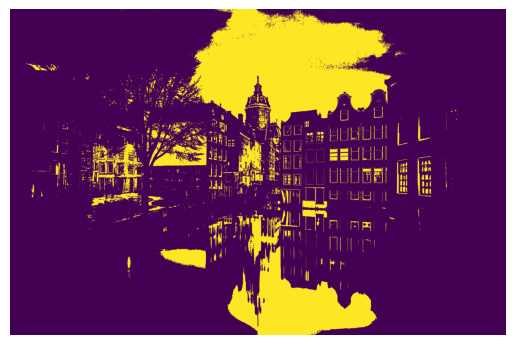

In [67]:
show_img(eroded_image)

In [68]:
# Dilation

dilated_image = cv2.dilate(otsu_image, kernel, iterations =1)

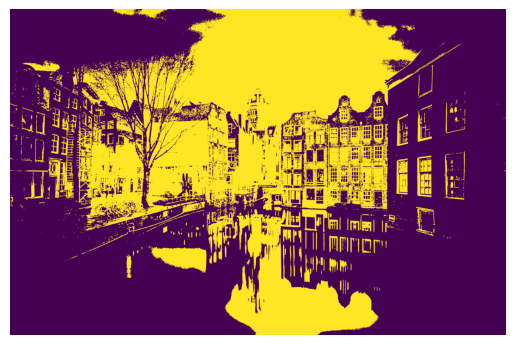

In [69]:
show_img(dilated_image)

In [70]:
# Opening =  erosion -> dilation

opened_image = cv2.morphologyEx(otsu_image, cv2.MORPH_OPEN ,kernel)



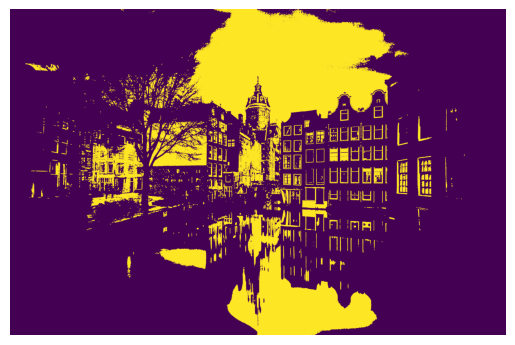

In [71]:
show_img(opened_image)

In [72]:
# closing = dilation > erosion

closed_image = cv2.morphologyEx(otsu_image, cv2.MORPH_CLOSE, kernel)


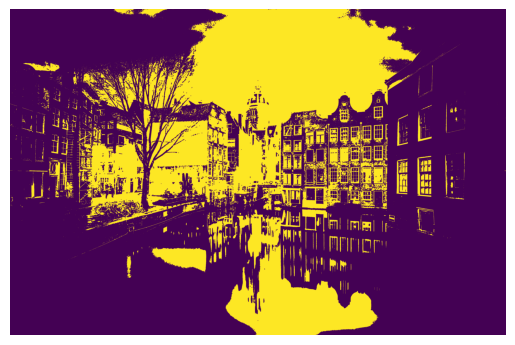

In [73]:
show_img(closed_image)

## Color spaces

RGB: Red, Green, Blue color model.

HSV (Hue, Saturation, Value): A color model based on human perception.

LAB: A color model designed to approximate human vision.

YUV: A color model used in video encoding, separating luminance (Y) and chrominance (UV).

In [78]:
# Convert to HSV

hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

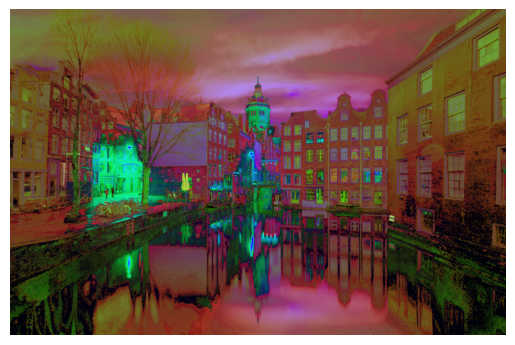

In [79]:
show_img(hsv_image)

In [81]:
# convert to LAB

lab_image = cv2.cvtColor(img , cv2.COLOR_BGR2LAB)

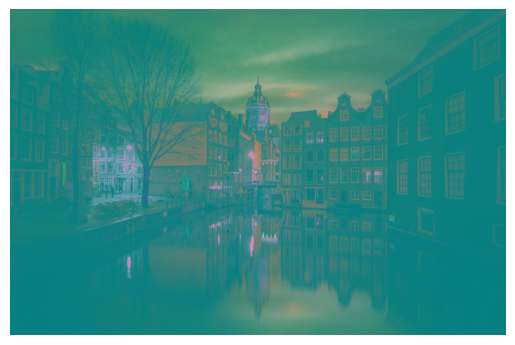

In [83]:
show_img(lab_image)

## Image compression

Lossless Compression: Reducing file size without losing image quality (e.g., PNG).

Lossy Compression: Reducing file size by discarding some image data (e.g., JPEG).

Quantization: Reducing the number of colors or intensity levels in an image.

In [84]:
# save image with compression (JPEG)

cv2.imwrite("compressed_image.jpeg", img, [cv2.IMWRITE_JPEG_QUALITY, 50])

True

In [85]:
# save image withous compression (png)

cv2.imwrite("loseless_image.png", img)

True

## Feature detection and Matching

SIFT (Scale-Invariant Feature Transform): Detects and describes local features in an image.

SURF (Speeded-Up Robust Features): A faster alternative to SIFT.

ORB (Oriented FAST and Rotated BRIEF): A fast and efficient feature detector.

Harris Corner Detection: Detects corners in an image.

In [3]:
# SIFT
print("try this in colab")
# sift = cv2.SIFT_create()
# keypoints, descriptions = sift.detectAndCompute(gs, None)

try this in colab


In [4]:
# sift_image = cv2.drawKeypoints(img, keypoints, None)


## Object detection and Recognition

Bounding Box: A rectangle drawn around an object in an image.

Sliding Window: A technique for detecting objects by scanning an image with a window.

Non-Maximum Suppression (NMS): A technique to eliminate redundant bounding boxes.

Haar Cascades: A machine learning-based approach for object detection.

In [10]:
# Import image with face

img = cv2.imread("./Images/face.jpg")

gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



# Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gs, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)



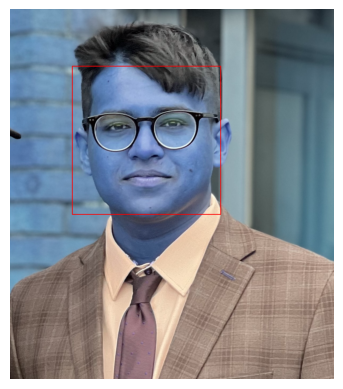

In [11]:
show_img(img)